<a href="https://colab.research.google.com/github/CranalLizze/IBM/blob/main/Concise_historical_automobile_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

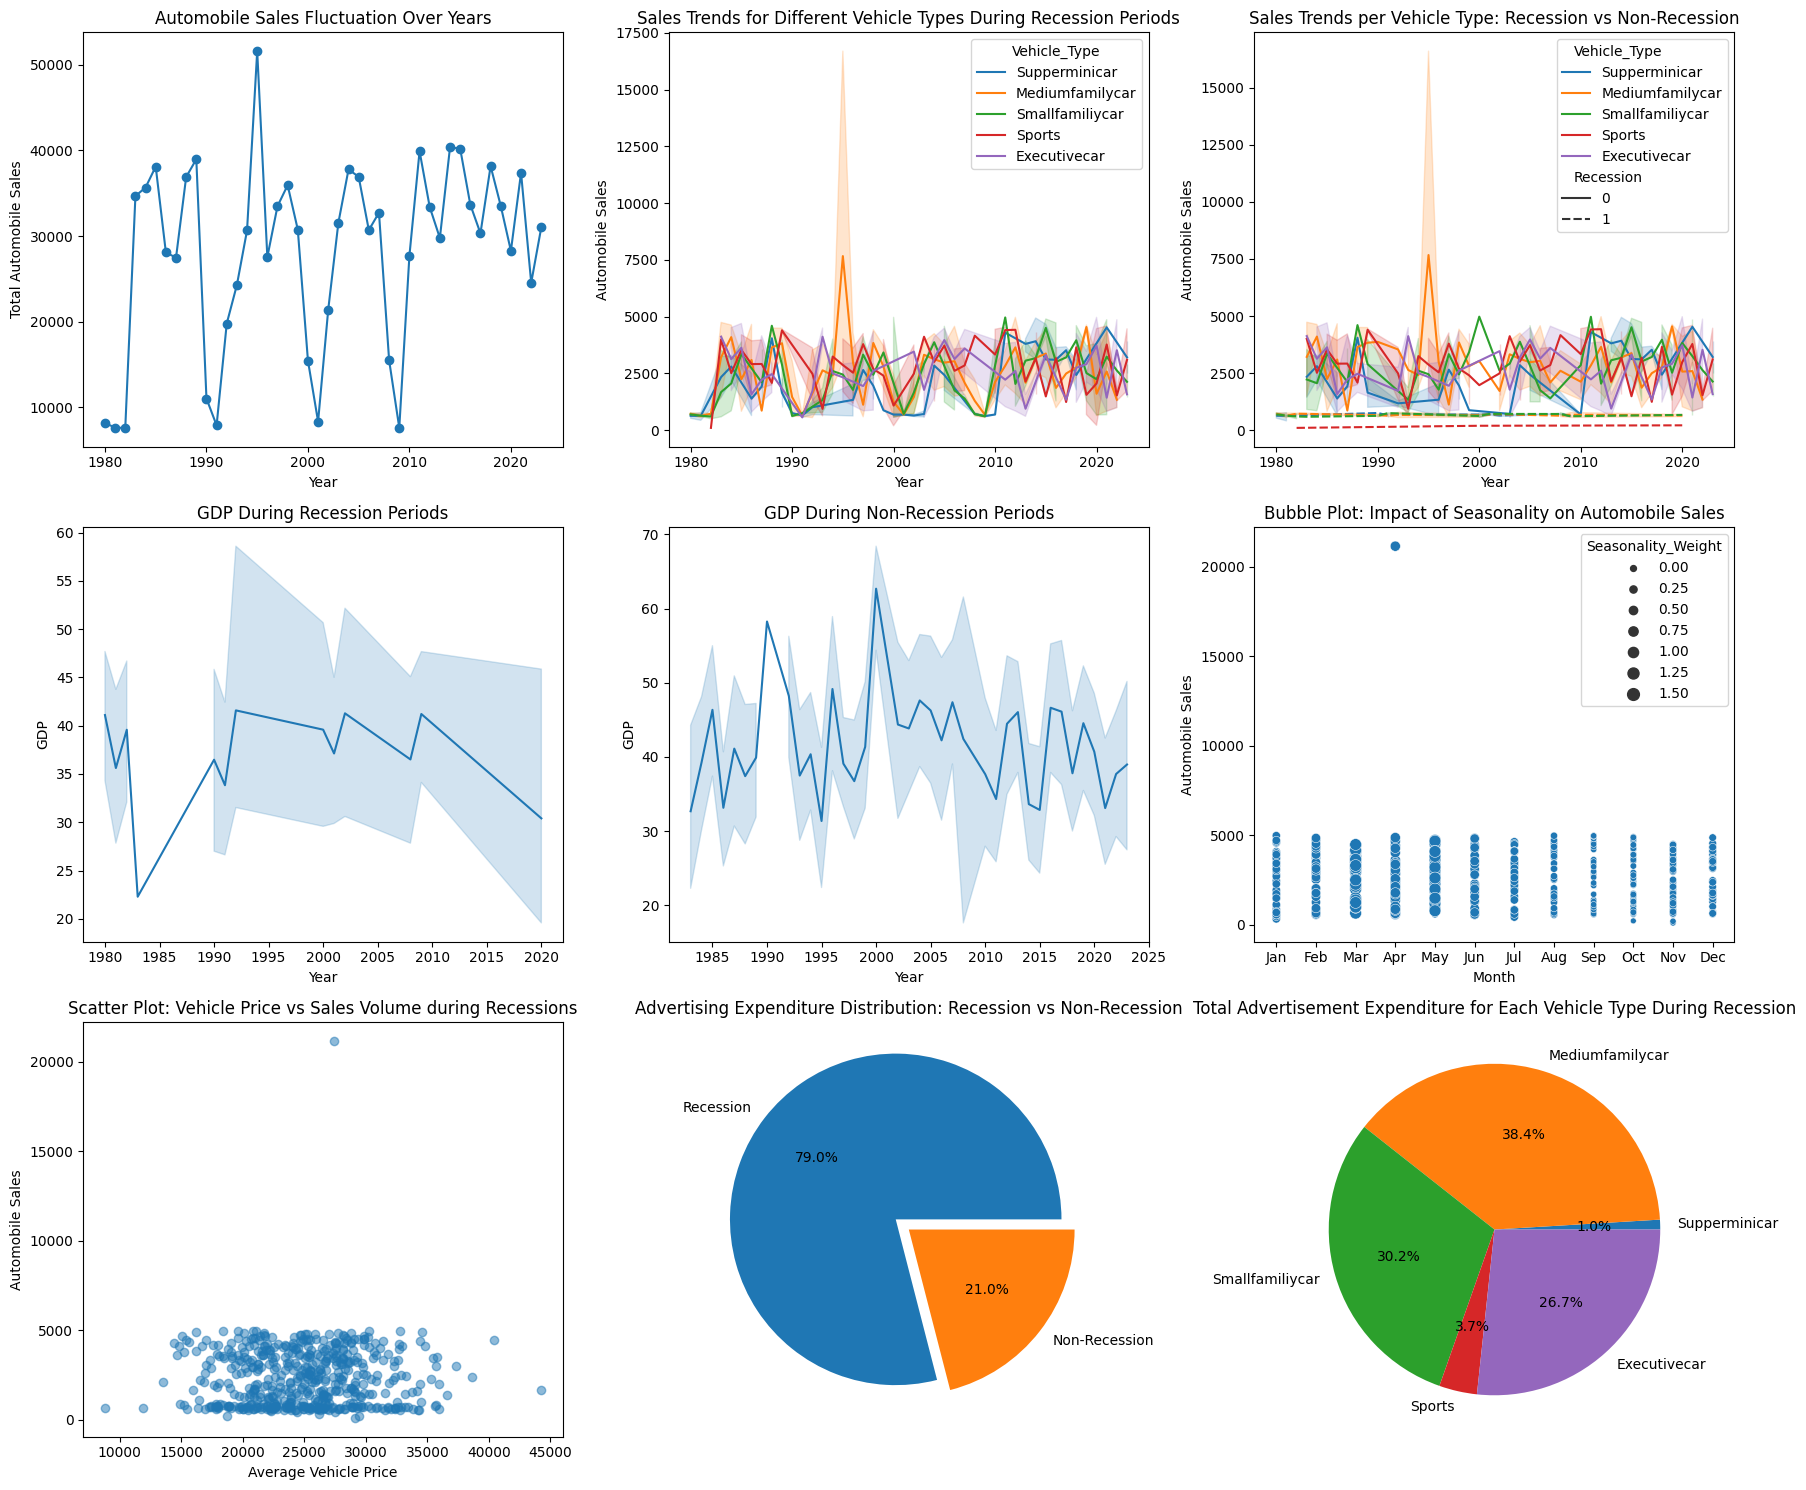

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
url = "https://raw.githubusercontent.com/CranalLizze/IBM/main/historical_automobile_sales.csv"
automobile_data = pd.read_csv(url)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.
automobile_data.groupby('Year')['Automobile_Sales'].sum().plot(ax=axes[0, 0], marker='o')
axes[0, 0].set_title('Automobile Sales Fluctuation Over Years')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Total Automobile Sales')

# Plot different lines for categories of vehicle type and analyze the trend
sns.lineplot(x='Year', y='Automobile_Sales', hue='Vehicle_Type', data=automobile_data, ax=axes[0, 1])
axes[0, 1].set_title('Sales Trends for Different Vehicle Types During Recession Periods')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Automobile Sales')

# Use Seaborn to compare sales trend per vehicle type for a recession period with a non-recession period
sns.lineplot(x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession', data=automobile_data, ax=axes[0, 2])
axes[0, 2].set_title('Sales Trends per Vehicle Type: Recession vs Non-Recession')
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('Automobile Sales')

# Use sub-plotting to compare variations in GDP during recession and non-recession periods
sns.lineplot(x='Year', y='GDP', data=automobile_data[automobile_data['Recession'] == 1], ax=axes[1, 0])
axes[1, 0].set_title('GDP During Recession Periods')

sns.lineplot(x='Year', y='GDP', data=automobile_data[automobile_data['Recession'] == 0], ax=axes[1, 1])
axes[1, 1].set_title('GDP During Non-Recession Periods')

# Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales
sns.scatterplot(x='Month', y='Automobile_Sales', size='Seasonality_Weight', data=automobile_data, ax=axes[1, 2])
axes[1, 2].set_title('Bubble Plot: Impact of Seasonality on Automobile Sales')
axes[1, 2].set_xlabel('Month')
axes[1, 2].set_ylabel('Automobile Sales')

# Use Matplotlib to develop a scatter plot to identify the correlation between average vehicle price and sales volume during recessions
axes[2, 0].scatter(automobile_data['Price'], automobile_data['Automobile_Sales'], alpha=0.5)
axes[2, 0].set_title('Scatter Plot: Vehicle Price vs Sales Volume during Recessions')
axes[2, 0].set_xlabel('Average Vehicle Price')
axes[2, 0].set_ylabel('Automobile Sales')

# Create a pie chart to display the portion of advertising expenditure during recession and non-recession periods
labels = ['Recession', 'Non-Recession']
explode = (0.1, 0)
axes[2, 1].pie(automobile_data.groupby('Recession')['Advertising_Expenditure'].sum(), labels=labels, autopct='%1.1f%%', explode=explode)
axes[2, 1].set_title('Advertising Expenditure Distribution: Recession vs Non-Recession')

# Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period
recession_data = automobile_data[automobile_data['Recession'] == 1]
axes[2, 2].pie(recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum(), labels=recession_data['Vehicle_Type'].unique(), autopct='%1.1f%%')
axes[2, 2].set_title('Total Advertisement Expenditure for Each Vehicle Type During Recession')

plt.tight_layout()
plt.show()
